In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

Celem jest predykcja ceny nieruchomości.

Zbiór danych zawiera 4802 instancje i kolumny określające:

BROKERTITLE: Title of the broker
TYPE: Type of the house
PRICE: Price of the house
BEDS: Number of bedrooms
BATH: Number of bathrooms
PROPERTYSQFT: Square footage of the property
ADDRESS: Full address of the house
STATE: State of the house
MAIN_ADDRESS: Main address information
ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
LOCALITY: Locality information
SUBLOCALITY: Sublocality information
STREET_NAME: Street name
LONG_NAME: Long name
FORMATTED_ADDRESS: Formatted address
LATITUDE: Latitude coordinate of the house
LONGITUDE: Longitude coordinate of the house

In [309]:
import pandas as pd
url = 'NY-House-Dataset.csv'
data = pd.read_csv(url, sep= ';')

In [310]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [311]:
category_columns = {'TYPE', 'BROKERTITLE', 'STATE', 'LONG_NAME', 'LOCALITY', 'ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'STREET_NAME'}

In [312]:
for column in category_columns:
    data[column] = data[column].str.lower()

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [314]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


In [315]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,brokered by douglas elliman -111 fifth ave,condo for sale,315000,2,2.000000,1400.0,2 e 55th st unit 803,"new york, ny 10022","2 e 55th st unit 803new york, ny 10022",new york county,new york,manhattan,east 55th street,regis residence,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.974483
1,brokered by serhant,condo for sale,195000000,7,10.000000,17545.0,central park tower penthouse-217 w 57th new yo...,"new york, ny 10019",central park tower penthouse-217 w 57th new yo...,united states,new york,new york county,new york,west 57th street,"217 w 57th st, new york, ny 10019, usa",40.766393,-73.980991
2,brokered by sowae corp,house for sale,260000,4,2.000000,2015.0,620 sinclair ave,"staten island, ny 10312","620 sinclair avestaten island, ny 10312",united states,new york,richmond county,staten island,sinclair avenue,"620 sinclair ave, staten island, ny 10312, usa",40.541805,-74.196109
3,brokered by compass,condo for sale,69000,3,1.000000,445.0,2 e 55th st unit 908w33,"manhattan, ny 10022","2 e 55th st unit 908w33manhattan, ny 10022",united states,new york,new york county,new york,east 55th street,"2 e 55th st, new york, ny 10022, usa",40.761398,-73.974613
4,brokered by sotheby's international realty - e...,townhouse for sale,55000000,7,2.373861,14175.0,5 e 64th st,"new york, ny 10065","5 e 64th stnew york, ny 10065",united states,new york,new york county,new york,east 64th street,"5 e 64th st, new york, ny 10065, usa",40.767224,-73.969856


In [316]:
data.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [317]:
numeric_columns = {'PRICE', 'BEDS','BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'}
category_columns = {'TYPE', 'BROKERTITLE', 'STATE', 'LONG_NAME', 'LOCALITY', 'ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'STREET_NAME'}

In [318]:
data[list(category_columns)].nunique()

LOCALITY                         11
ADDRESS                        4582
STREET_NAME                     174
LONG_NAME                      2731
SUBLOCALITY                      21
MAIN_ADDRESS                   4583
FORMATTED_ADDRESS              4550
STATE                           308
BROKERTITLE                    1011
TYPE                             13
ADMINISTRATIVE_AREA_LEVEL_2      29
dtype: int64

In [319]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  214


Brokertitle

In [320]:
data['BROKER'] = data['BROKERTITLE'].str.replace('llc','')
data['BROKER'] = data['BROKER'].str.replace('inc','')
data['BROKER'] = data['BROKER'].str.replace('rlty','realty')
data['BROKER'] = data['BROKER'].str.replace('.','')
def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else value
    result = result.strip()
    return result

data['BROKER'] = data['BROKER'].apply(lambda x: split_by_delimeter(x, ' -'))

TYPE

In [321]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]


,BATH,BEDS
75,2.373861,3
77,2.373861,3
78,2.373861,3
360,2.373861,3
377,2.373861,3
392,2.373861,3
397,2.373861,3
400,2.000000,3
401,2.373861,3
402,2.373861,3


In [322]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]= 0
data["TYPE"] = data["TYPE"].str.replace('condop', 'condo')

data['ANNOUNCEMENT_TYPE'] = data['TYPE'].replace({
                                    'condo for sale': 'apartment',
                                     'townhouse for sale': 'home',
                                     'house for sale': 'home',
                                     'multi-family home for sale': 'home',
                                     'co-op for sale': 'co-op',
                                     'mobile house for sale': 'home',
                                     'land for sale': 'land',
                                     'foreclosure': 'other',
                                     'contingent': 'other',
                                     'pending': 'other',
                                     'coming soon': 'other',
                                    'for sale': 'other'})
data["TYPE"] = data["TYPE"].str.replace(" for sale", "")

PRICE

In [323]:
data.drop(data.loc[(data["PRICE"] > 100000000) | (data["PRICE"]<10000)].index, inplace= True)
data['PRICE'] = data['PRICE'].astype(float)

BATH, BEDS

In [324]:
data['BATH'].value_counts()

BATH
2.000000     1592
1.000000     1454
4.000000      464
3.000000      447
2.373861      242
6.000000      133
5.000000       95
0.000000       48
8.000000       43
7.000000       23
10.000000      15
9.000000        7
16.000000       5
20.000000       3
12.000000       3
11.000000       2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64

In [325]:
data['BEDS'].value_counts()

BEDS
3     1349
2      949
1      779
4      544
5      339
6      260
7       98
8       81
0       46
9       38
12      22
10      21
11      20
14       6
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

In [326]:
data['PROPERTYSQFT1000'] = data['PROPERTYSQFT'].apply(lambda x: x//1000)
data['PROPERTYSQFT1000'].value_counts()


PROPERTYSQFT1000
2.0     2035
1.0     1157
0.0      817
3.0      258
4.0      111
5.0       75
6.0       41
7.0       22
8.0       18
9.0        9
12.0       8
10.0       6
11.0       4
15.0       3
18.0       2
17.0       2
14.0       1
48.0       1
20.0       1
22.0       1
24.0       1
21.0       1
16.0       1
55.0       1
13.0       1
33.0       1
27.0       1
23.0       1
32.0       1
65.0       1
Name: count, dtype: int64

In [327]:
data = data[(data['BATH'] >= 0) & (data['BATH'] <= 10)]
data = data[(data['BEDS'] >= 0) & (data['BEDS'] <= 12)]
data['BATH'] = data['BATH'].apply(lambda x: x if float.is_integer(x) else int(x))
data = data[(data['PROPERTYSQFT1000'] >= 0) & (data['PROPERTYSQFT1000'] <= 8)]

data['PROPERTYSQFT'] = data['PROPERTYSQFT'].round(2)

Cleaning adresses

In [328]:
data_api = data.copy()

In [329]:
(data["ADDRESS"] + data["STATE"] == data["MAIN_ADDRESS"]).unique()
data.drop("MAIN_ADDRESS", axis=1, inplace=True)

In [330]:
grouped_df = data.groupby('LOCALITY').agg({'LATITUDE': ['mean'],
                                      'LONGITUDE': ['mean']})

counties = list(set(data['LOCALITY']))
data['LOCALITY'] = data['LOCALITY'].str.capitalize()
replace_with_closest_county = list(data[data['LOCALITY']=='united states'].index)
for ind in replace_with_closest_county:
    x1, y1 = data.loc[ind,'LONGITUDE'], data.loc[ind,'LATITUDE']
    closest_county,distance = None,20
    for county in counties:
        x2, y2 = grouped_df.loc[county, ('LONGITUDE', 'mean')], grouped_df.loc[county, ('LATITUDE', 'mean')]
        distance_check = abs(x1-x2) + abs(y1-y2)
        if distance_check<distance:
            distance = distance_check
            closest_county = county
    data.loc[ind,'LOCALITY'] = county

In [331]:
dictLocality = {"new york county": "manhattan",  "kings county":"brooklyn","bronx county":"the bronx", "richmond county": "staten island", "queens county":"queens"}
listOfBoroughs = list(dictLocality.values())

In [332]:
for c in list(data.columns):
  for i in list(dictLocality.keys()):
    data[c] = data[c].astype(str).str.replace(i, dictLocality[i])

In [333]:
data["LOCALITY"].unique()
data.loc[data["LOCALITY"].isin(['manhattan', 'the bronx', 'brooklyn', 'queens', 'staten island']), "BOROUGH"] = data['LOCALITY']
data["BOROUGH"].unique()
data.loc[data["LOCALITY"] == "flatbush", "NEIGHBOURHOOD"] = data['LOCALITY']

In [334]:
data["SUBLOCALITY"].unique()
data.loc[(data["SUBLOCALITY"].isin(listOfBoroughs)) &(data["BOROUGH"].isna()) , "BOROUGH"] = data["SUBLOCALITY"]
data.loc[data["SUBLOCALITY"] == "snyder avenue" , "STREET"] = data["SUBLOCALITY"]
data.loc[(data["SUBLOCALITY"].isin(list(filter(lambda x: x not in listOfBoroughs, list(data["SUBLOCALITY"]))))) & (~(data["SUBLOCALITY"].isin(["new york", "snyder avenue"]))) , "NEIGHBOURHOOD"] = data["SUBLOCALITY"]
data


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,...,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKER,ANNOUNCEMENT_TYPE,PROPERTYSQFT1000,BOROUGH,NEIGHBOURHOOD,STREET
0,brokered by douglas elliman -111 fifth ave,condo,315000.0,2,2.0,1400.0,2 e 55th st unit 803,"new york, ny 10022",manhattan,New york,...,regis residence,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.9744834,brokered by douglas elliman,apartment,1.0,manhattan,NaN,NaN
2,brokered by sowae corp,house,260000.0,4,2.0,2015.0,620 sinclair ave,"staten island, ny 10312",united states,New york,...,sinclair avenue,"620 sinclair ave, staten island, ny 10312, usa",40.5418051,-74.1961086,brokered by sowae corp,home,2.0,staten island,NaN,NaN
3,brokered by compass,condo,69000.0,3,1.0,445.0,2 e 55th st unit 908w33,"manhattan, ny 10022",united states,New york,...,east 55th street,"2 e 55th st, new york, ny 10022, usa",40.7613979,-73.9746128,brokered by compass,apartment,0.0,manhattan,NaN,NaN
5,brokered by sowae corp,house,690000.0,5,2.0,4004.0,584 park pl,"brooklyn, ny 11238",united states,New york,...,park place,"584 park pl, brooklyn, ny 11238, usa",40.6743632,-73.9587248,brokered by sowae corp,home,4.0,brooklyn,NaN,NaN
6,brokered by douglas elliman - 575 madison ave,condo,899500.0,2,2.0,2184.21,157 w 126th st unit 1b,"new york, ny 10027",new york,New york county,...,157,"157 w 126th st #1b, new york, ny 10027, usa",40.809448,-73.946777,brokered by douglas elliman,apartment,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,brokered by compass,co-op,599000.0,1,1.0,2184.21,222 e 80th st apt 3a,"manhattan, ny 10075",new york,New york county,...,222,"222 e 80th st #3a, new york, ny 10075, usa",40.77435,-73.955879,brokered by compass,co-op,2.0,NaN,NaN,NaN
4797,brokered by mjr real estate llc,co-op,245000.0,1,1.0,2184.21,97-40 62 dr unit lg,"rego park, ny 11374",united states,New york,...,62nd drive,"97-40 62nd dr, rego park, ny 11374, usa",40.7325379,-73.8601516,brokered by mjr real estate,co-op,2.0,queens,NaN,NaN
4798,brokered by douglas elliman - 575 madison ave,co-op,1275000.0,1,1.0,2184.21,427 w 21st st unit garden,"new york, ny 10011",united states,New york,...,west 21st street,"427 w 21st st, new york, ny 10011, usa",40.7458817,-74.0033976,brokered by douglas elliman,co-op,2.0,manhattan,NaN,NaN
4799,brokered by e realty international corp,condo,598125.0,2,1.0,655.0,91-23 corona ave unit 4g,"elmhurst, ny 11373",new york,Queens county,...,91-23,"91-23 corona ave. #4b, flushing, ny 11373, usa",40.7427705,-73.8727516,brokered by e realty international corp,apartment,0.0,queens,NaN,NaN


In [335]:
data["ADMINISTRATIVE_AREA_LEVEL_2"].unique()
data.loc[(data["ADMINISTRATIVE_AREA_LEVEL_2"].isin(listOfBoroughs)) &(data["BOROUGH"].isna()) , "BOROUGH"] = data["ADMINISTRATIVE_AREA_LEVEL_2"]
data.loc[(data["ADMINISTRATIVE_AREA_LEVEL_2"].isin(list(filter(lambda x: x not in listOfBoroughs, list(data["ADMINISTRATIVE_AREA_LEVEL_2"]))))) & (data["ADMINISTRATIVE_AREA_LEVEL_2"] != "new york") & (data["ADMINISTRATIVE_AREA_LEVEL_2"] != "united states") , "POSTCODE"] = data["ADMINISTRATIVE_AREA_LEVEL_2"]

In [336]:
data["STREET_NAME"].unique()

array(['east 55th street', 'staten island', 'new york', 'brooklyn',
       'manhattan', 'morrison avenue', 'midwood', 'concourse village',
       'flushing', 'elmhurst', 'annadale', 'queens', 'fort hamilton',
       'north riverdale', 'rego park', 'forest hills', 'the bronx',
       'dongan hills', 'jackson heights', 'clifton', 'mariners harbor',
       'dyker heights', 'williamsburg', 'concourse', 'mid island',
       'centre street', 'cobble hill', 'park slope', 'brighton beach',
       'flatbush', 'prospect heights', 'woodhaven', 'bedford-stuyvesant',
       'jamaica', 'spuyten duyvil', 'bay ridge', 'shore acres', 'bayside',
       'glen oaks', 'fresh meadows', 'highbridge', 'sheepshead bay',
       'rector place', 'kew gardens', 'bushwick', 'hudson hill',
       'rosedale', 'east bronx', 'parkchester', 'borough park',
       'brooklyn heights', 'little haiti', 'canarsie', 'kensington',
       'east 110th street', 'east new york', 'pelham bay', 'howard beach',
       'downtown brook

In [337]:
addresses_shortcut = {
        ' st': ' street',
        ' ave': ' avenue',
        ' rd': ' road',
        ' blvd': ' boulevard',
        ' dr': ' drive',
        ' pkwy': ' parkway',
        ' ct': ' court',
        ' ln': ' lane',
        ' pl': ' place',
        ' sq': ' square',
        ' apt': '',
        ' ste': '',
        ' num': ''
    }

for add in addresses_shortcut.keys():
    mask = data["STREET_NAME"].str.contains(fr'\b{add}\b')
    data.loc[mask, "STREET"] = data.loc[mask, "STREET"].str.replace(add, addresses_shortcut[add])

streets = []
keyWords = ["street", "parkway", "avenue", "drive", "road"]
for street_name in data["STREET_NAME"]:
    for keyword in keyWords:
        if keyword in street_name:
            streets.append(street_name)

streets

['east 55th street',
 'morrison avenue',
 'centre street',
 'east 110th street',
 'surf avenue',
 'old fulton street',
 'east 74th street',
 '35th avenue',
 'henry hudson parkway',
 'surf avenue',
 'columbia street waterfront district',
 'east 22nd street',
 'oxford avenue',
 'east 96th street',
 '5th avenue',
 'shore road',
 'west 56th street',
 'west 111th street',
 'east 10th street',
 '139th street',
 'park avenue',
 'west 65th street',
 'john street',
 'east end avenue',
 '5th avenue',
 'west 13th street',
 'oxford avenue',
 'east 88th street',
 'west 64th street',
 '61st street',
 '67th drive',
 'saunders street',
 'east 55th street',
 'west 56th street',
 'surf avenue']

In [338]:

data.loc[(data["STREET_NAME"].isin(listOfBoroughs))& (data["BOROUGH"].isna()), "BOROUGH"] = data["STREET_NAME"]
data.loc[(data["STREET_NAME"].isin(list(filter(lambda x: (x not in streets) & (x != "new york") & (x not in listOfBoroughs), list(data["STREET_NAME"]))))) & (data["NEIGHBOURHOOD"].isna()), "NEIGHBOURHOOD"] = data["STREET_NAME"]
data.loc[(data["STREET_NAME"].isin(streets)) & (data["STREET"].isna()), "STREET"] = data["STREET_NAME"]

In [339]:
state_replacements = {
    'ny': 'new york',
    'nyc': 'new york',
    'new yorkc': 'new york',
    'new york city': 'new york',
    'kew gardens hill': 'kew garden hills',
    'kew gardens': 'kew garden hills',
    'kew gardens hills': 'kew garden hills',
    'kew gardens hillss': 'kew garden hills',
    'bronx new york': 'the bronx',
    'queens village': 'queens',
    'bronx ny': 'the bronx',
    'brooklyn heights': 'brooklyn',
    'bronx': 'the bronx'
}
data['STATE'] = data['STATE'].str.lower()
data['STATE'] = data['STATE'].replace(state_replacements)
data['STATE'] = data['STATE'].str.capitalize()
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKER,ANNOUNCEMENT_TYPE,PROPERTYSQFT1000,BOROUGH,NEIGHBOURHOOD,STREET,POSTCODE
0,brokered by douglas elliman -111 fifth ave,condo,315000.0,2,2.0,1400.0,2 e 55th st unit 803,"New york, ny 10022",manhattan,New york,...,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.9744834,brokered by douglas elliman,apartment,1.0,manhattan,NaN,east 55th street,NaN
2,brokered by sowae corp,house,260000.0,4,2.0,2015.0,620 sinclair ave,"Staten island, ny 10312",united states,New york,...,"620 sinclair ave, staten island, ny 10312, usa",40.5418051,-74.1961086,brokered by sowae corp,home,2.0,staten island,NaN,NaN,NaN
3,brokered by compass,condo,69000.0,3,1.0,445.0,2 e 55th st unit 908w33,"Manhattan, ny 10022",united states,New york,...,"2 e 55th st, new york, ny 10022, usa",40.7613979,-73.9746128,brokered by compass,apartment,0.0,manhattan,NaN,NaN,NaN
5,brokered by sowae corp,house,690000.0,5,2.0,4004.0,584 park pl,"Brooklyn, ny 11238",united states,New york,...,"584 park pl, brooklyn, ny 11238, usa",40.6743632,-73.9587248,brokered by sowae corp,home,4.0,brooklyn,NaN,NaN,NaN
6,brokered by douglas elliman - 575 madison ave,condo,899500.0,2,2.0,2184.21,157 w 126th st unit 1b,"New york, ny 10027",new york,New york county,...,"157 w 126th st #1b, new york, ny 10027, usa",40.809448,-73.946777,brokered by douglas elliman,apartment,2.0,manhattan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,brokered by compass,co-op,599000.0,1,1.0,2184.21,222 e 80th st apt 3a,"Manhattan, ny 10075",new york,New york county,...,"222 e 80th st #3a, new york, ny 10075, usa",40.77435,-73.955879,brokered by compass,co-op,2.0,manhattan,NaN,NaN,NaN
4797,brokered by mjr real estate llc,co-op,245000.0,1,1.0,2184.21,97-40 62 dr unit lg,"Rego park, ny 11374",united states,New york,...,"97-40 62nd dr, rego park, ny 11374, usa",40.7325379,-73.8601516,brokered by mjr real estate,co-op,2.0,queens,NaN,NaN,NaN
4798,brokered by douglas elliman - 575 madison ave,co-op,1275000.0,1,1.0,2184.21,427 w 21st st unit garden,"New york, ny 10011",united states,New york,...,"427 w 21st st, new york, ny 10011, usa",40.7458817,-74.0033976,brokered by douglas elliman,co-op,2.0,manhattan,NaN,NaN,NaN
4799,brokered by e realty international corp,condo,598125.0,2,1.0,655.0,91-23 corona ave unit 4g,"Elmhurst, ny 11373",new york,Queens county,...,"91-23 corona ave. #4b, flushing, ny 11373, usa",40.7427705,-73.8727516,brokered by e realty international corp,apartment,0.0,queens,flushing,NaN,NaN


In [340]:
data["STATE"].unique()
data.loc[data["POSTCODE"].isna(), "POSTCODE"] = data["STATE"].str.slice(-5)
data.loc[(data["BOROUGH"].isna()) &(data["STATE"].str.split(", ").str.get(0).isin(listOfBoroughs)) , "BOROUGH"] = data["STATE"].str.split(", ").str.get(0)
data.loc[(data["NEIGHBOURHOOD"].isna()) & (~(data["STATE"].str.split(", ").str.get(0).isin(listOfBoroughs))) &(~(data["STATE"].str.split(", ").str.get(0).isin(["new york", "ny", "nyc" ]))) , "NEIGHBOURHOOD"] = data["STATE"].str.split(", ").str.get(0)

In [341]:
data.loc[data["POSTCODE"].isna(), "POSTCODE"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-2).str.slice(-5)
data.loc[(data["BOROUGH"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(listOfBoroughs)), "BOROUGH"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3)
data.loc[(data["NEIGHBOURHOOD"].isna()) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(listOfBoroughs))) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3).isin(["new york"]))), "NEIGHBOURHOOD"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-3)

In [342]:
data.loc[data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'), "HOUSE_NUMBER"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0)
data.loc[(data["STREET"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d')), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.slice(start=1).str.join(" ")
data.loc[(data["STREET"].isna()) & (~(data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'))), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_27901/2895737151.py:1: SyntaxWarning: invalid escape sequence '\d'
  data.loc[data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d'), "HOUSE_NUMBER"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0)
/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_27901/2895737151.py:2: SyntaxWarning: invalid escape sequence '\d'
  data.loc[(data["STREET"].isna()) & (data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str.split().str.get(0).str.replace("-","").str.contains('\d')), "STREET"] = data["FORMATTED_ADDRESS"].str.split(", ").str.get(-4).str

In [343]:
data.loc[(data["LONG_NAME"].str.replace("-", "").str.isdigit()), "HOUSE_NUMBER"] = data["LONG_NAME"]
data.loc[(~(data["LONG_NAME"].str.replace("-", "").str.isdigit())) & (data["STREET"].isna()) & (data["LONG_NAME"] != "parking lot"), "STREET"] = data["LONG_NAME"]

In [344]:
data.loc[(data["ADDRESS"].str.split(" ").str.get(0).str.replace("-", "").str.isdigit()) & (data["HOUSE_NUMBER"].isna()), "HOUSE_NUMBER"] = data["ADDRESS"].str.split(" ").str.get(0).str.split().str.get(0)

In [345]:
data.loc[data["ADDRESS"] == "98A-98G Discala Ln", "HOUSE_NUMBER"] = "98A-98G"

In [346]:
import re
data.loc[data["STREET"].str.contains(r'\bE\b'), "STREET"] = data["STREET"].str.replace("e", "east")
data.loc[data["STREET"].str.contains(r'\bW\b'), "STREET"] = data["STREET"].str.replace("w", "west")
data.loc[data["STREET"].str.contains(r'\bS\b'), "STREET"] = data["STREET"].str.replace("s", "south")
data.loc[data["STREET"].str.contains(r'\bN\b'), "STREET"] = data["STREET"].str.replace("n", "north")


data.loc[data["STREET"].str.contains(r' #.*'), "STREET"] = data["STREET"].str.replace(r' #.*', "")
data["STREET"]= data["STREET"].str.replace(".", "")
data["STREET"]= data["STREET"].str.lower()
data["STREET"].unique()
    
def clean_street_names(street_name):
    
    parts = street_name.split(' ')
    cleaned_parts = [part for part in parts if re.match(r'^\d*(?:th|st|rd|nd)?$', part) or not any(c.isdigit() for c in part) ]
    cleaned_parts = [part for part in cleaned_parts if not part.isdigit() and len(part) != 1]
    
    last_part = cleaned_parts[-1] if cleaned_parts else None
    if last_part and any(character.isdigit() for character in last_part):
        cleaned_parts.remove(last_part)

    return ' '.join(cleaned_parts)

data['STREET'] = data['STREET'].apply(clean_street_names)
 
data['STREET'] 


0       east 55th street
2           sinclair ave
3                55th st
5                park pl
6               126th st
              ...       
4796             80th st
4797             62nd dr
4798             21st st
4799          corona ave
4800         neptune ave
Name: STREET, Length: 4507, dtype: object

In [347]:
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',
       'LATITUDE', 'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE',
       'PROPERTYSQFT1000', 'BOROUGH', 'NEIGHBOURHOOD', 'STREET', 'POSTCODE',
       'HOUSE_NUMBER'],
      dtype='object')

In [348]:
data.drop(columns = ['BROKERTITLE', 
       'ADDRESS', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',
       'PROPERTYSQFT1000'], inplace=True)

In [349]:
category_columns = list(set(data.columns) - set(numeric_columns))

In [350]:
for column in category_columns:
    data[column] = data[column].str.lower()

In [351]:
data.columns

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE',
       'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE', 'BOROUGH', 'NEIGHBOURHOOD',
       'STREET', 'POSTCODE', 'HOUSE_NUMBER'],
      dtype='object')

In [352]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  1


In [353]:
data.to_excel('ssdata.xlsx')

In [354]:
"""fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.histplot(x=data[column], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()"""

'fig, axes = plt.subplots(3,2, figsize=(16, 12))\naxes = axes.flatten()\n\ni=0\nfor column in numeric_columns:\n    sns.histplot(x=data[column], ax=axes[i])\n    i=i+1\n\nplt.tight_layout()\nplt.show()'

In [355]:
"""fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.scatterplot(x=data[column], y=data['PRICE'], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()"""

"fig, axes = plt.subplots(3,2, figsize=(16, 12))\naxes = axes.flatten()\n\ni=0\nfor column in numeric_columns:\n    sns.scatterplot(x=data[column], y=data['PRICE'], ax=axes[i])\n    i=i+1\n\nplt.tight_layout()\nplt.show()"

In [356]:
"""plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='LONGITUDE', y='LATITUDE', hue='PRICE', palette='viridis', size='PROPERTYSQFT', sizes=(20, 200))
plt.title('New York Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper left')
plt.grid(True)
plt.show()"""

"plt.figure(figsize=(10, 8))\nsns.scatterplot(data=data, x='LONGITUDE', y='LATITUDE', hue='PRICE', palette='viridis', size='PROPERTYSQFT', sizes=(20, 200))\nplt.title('New York Properties')\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\nplt.legend(title='Price', loc='upper left')\nplt.grid(True)\nplt.show()"

In [357]:
category_columns = list(set(data.columns) - numeric_columns)
numeric_columns = list(numeric_columns)
data[list(category_columns)].nunique()

HOUSE_NUMBER         2397
NEIGHBOURHOOD         162
POSTCODE              178
BROKER                947
BOROUGH                 5
TYPE                   12
STREET               1894
ANNOUNCEMENT_TYPE       5
dtype: int64

<Axes: >

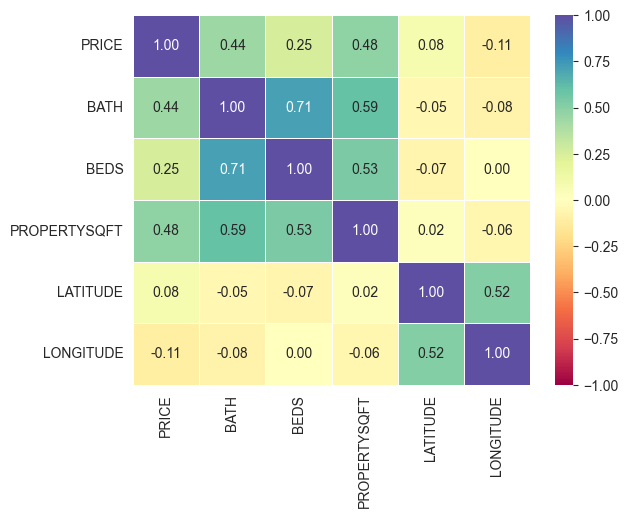

In [358]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

In [359]:
data.to_excel('ssdata.xlsx')

In [360]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns.remove('PRICE')
print(len(numeric_columns))

mm_scalers = {}
for column in numeric_columns:
    mm_scalers[column] = MinMaxScaler()
    data[column] = mm_scalers[column].fit_transform(data[column].values.reshape(-1, 1))

5


In [361]:
len(category_columns)

8

In [362]:
len(data.columns)

14

In [363]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in category_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [364]:
for column in category_columns:
    for class_index, class_name in enumerate(label_encoders[column].classes_):
        print(f"{class_name}: {class_index}")

1: 0
1-26: 1
10: 2
10-18: 3
10-40: 4
10-41: 5
10-45: 6
100: 7
100-03: 8
100-05: 9
100-25: 10
1000: 11
1009: 12
101: 13
101-11: 14
101-55: 15
1010: 16
10102: 17
10114: 18
1016: 19
1017: 20
1019: 21
102: 22
102-04: 23
102-10: 24
102-15: 25
102-17: 26
102-26: 27
102-30: 28
102-33: 29
102-37: 30
102-40: 31
102-42: 32
102-57: 33
1020: 34
10229: 35
1023: 36
10236: 37
1024: 38
1025: 39
1027: 40
103-12: 41
10306: 42
1032: 43
1035: 44
1038: 45
104: 46
104-02: 47
104-06: 48
104-14: 49
104-30: 50
104-33: 51
104-37: 52
104-40: 53
1040: 54
10421: 55
1045: 56
1046: 57
1049: 58
105: 59
105-26: 60
105-47: 61
1050: 62
1051: 63
10557: 64
1056: 65
106: 66
106-09: 67
106-10: 68
1060: 69
1065: 70
1068: 71
1069: 72
107: 73
1070: 74
10716: 75
10724: 76
10740: 77
1075: 78
1077: 79
108: 80
108-16: 81
108-36: 82
108-49: 83
108-50: 84
1085: 85
1086: 86
1088: 87
109: 88
109-06: 89
109-20: 90
109-42: 91
109-9: 92
1091: 93
11: 94
11-18: 95
110: 96
110-02: 97
110-11: 98
110-19: 99
110-25: 100
110-35: 101
110-36: 102

<Axes: >

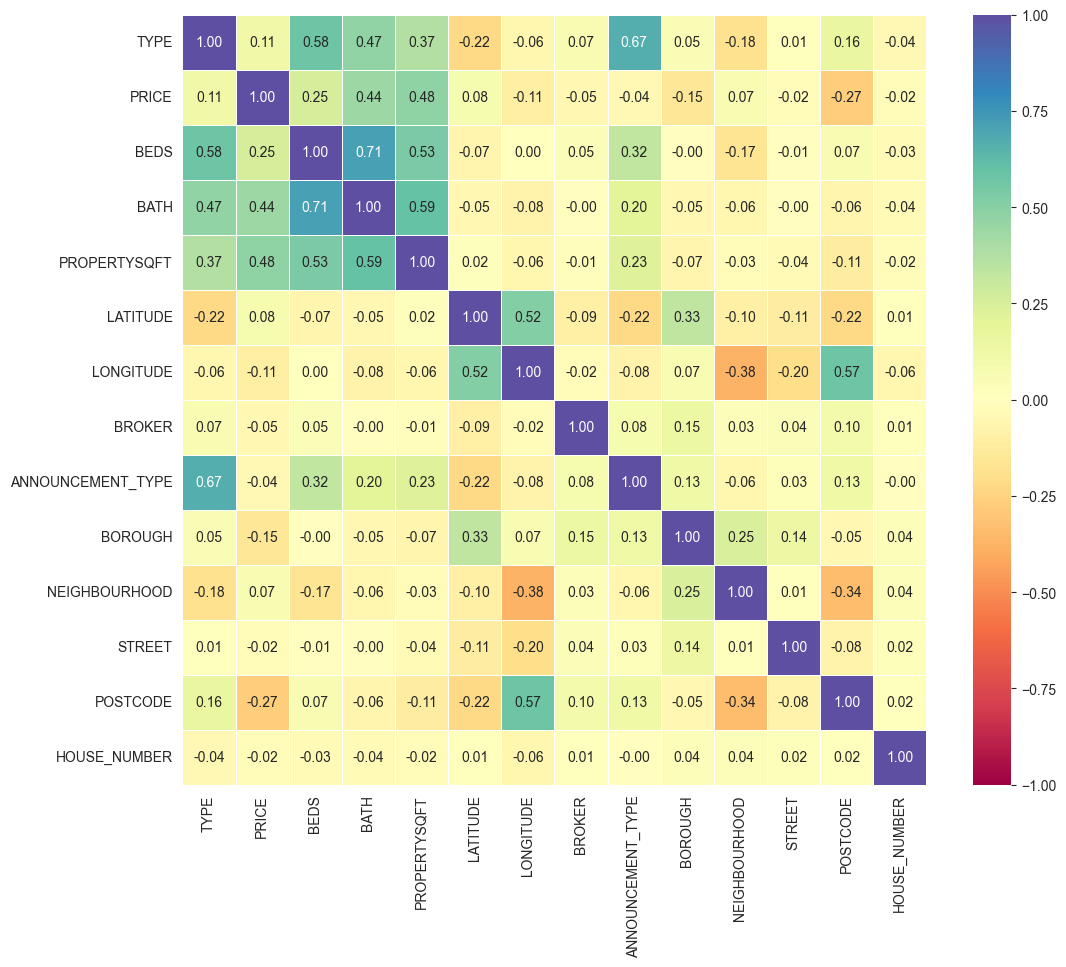

In [365]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

In [366]:
corr_matrix = data.corr()
corr_df = pd.DataFrame(abs(corr_matrix['PRICE'].drop('PRICE')).sort_values(ascending=True))
relevant_columns = corr_df[corr_df['PRICE']>=0.03].index
relevant_columns = list(relevant_columns)
relevant_columns.append('PRICE')
data_relevant = data[relevant_columns]

<Axes: >

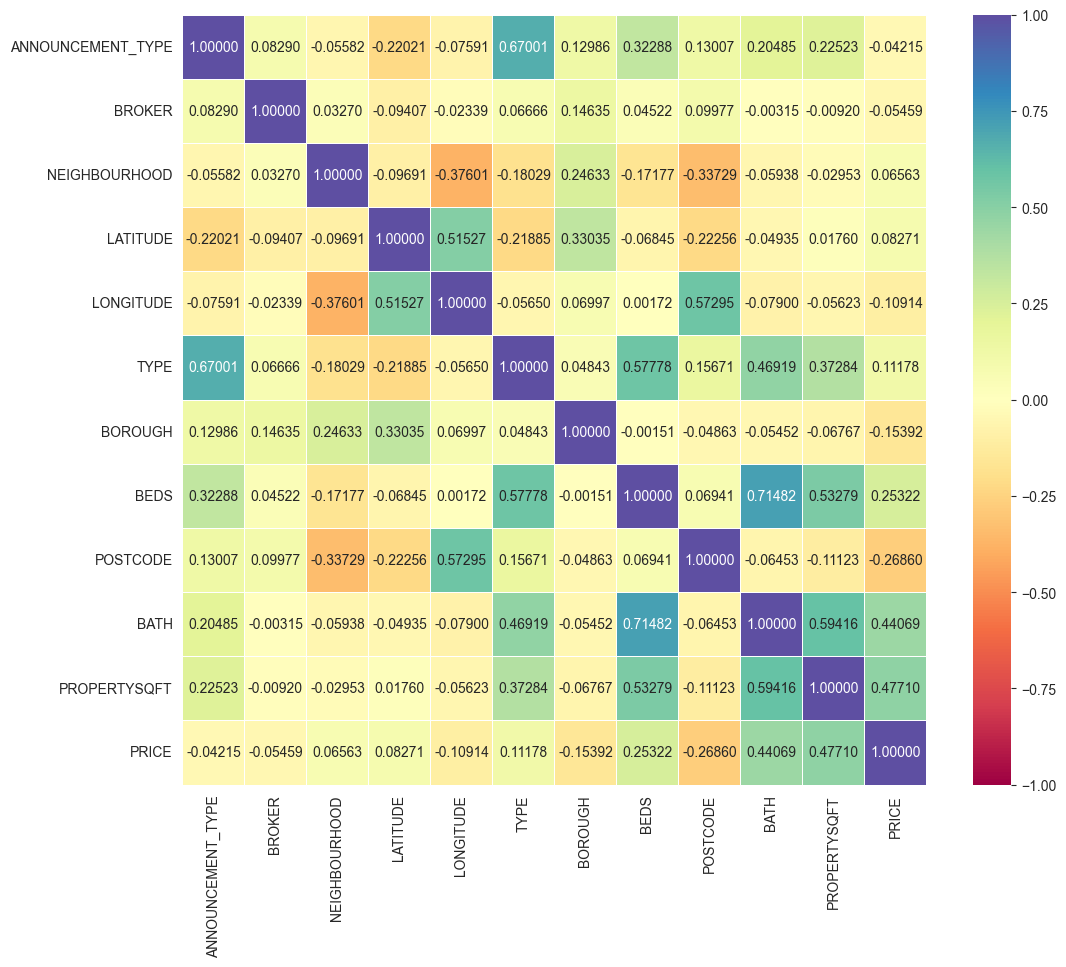

In [367]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_relevant.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".5f", vmax=1, vmin=-1)

In [368]:
data.to_excel('clean_data.xlsx')
data_relevant.to_excel('clean_data_relevant.xlsx')

In [369]:
from sklearn.decomposition import PCA
X = data_relevant.drop(columns =['PRICE'])
y = data_relevant['PRICE']

n_comp = 3
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)
print(pca.explained_variance_ratio_)
data_relevant_pca

[0.94017101 0.04031661 0.01929296]


,feature_0,feature_1,feature_2
0,-159.858299,-67.273825,-15.530271
1,407.930097,-68.084496,26.602666
2,-219.928891,-57.392692,-26.432004
3,408.654597,64.871416,-26.123232
4,-159.762120,-63.317811,-12.474431
...,...,...,...
4501,-219.507268,-40.011897,-12.973922
4502,156.669548,18.809984,74.095987
4503,-160.033037,-74.420164,-21.019385
4504,-146.656376,62.595066,25.342757


In [370]:
data_relevant_pca.to_excel('clean_data_relevant_pca.xlsx')

GEOPY

In [371]:
from geopy.geocoders import Nominatim
data_api = pd.read_excel('ssdata.xlsx')
geolocator = Nominatim(user_agent="project_ml_2024_NA")
indexes = list(data_api.index)
api_keys = set()

for ind in indexes:
    latitude = data_api.at[ind, 'LATITUDE']
    longitude = data_api.at[ind, 'LONGITUDE']
    address = geolocator.reverse(f"{latitude},{longitude}")
    data_api.at[ind, 'API_ADDRESS_NAME'] = address.raw['display_name']
    data_api.at[ind, 'API_ADDRESS'] = address.raw['address']
    keys = set(address.raw['address'].keys())
    print(ind)
    api_keys.update(keys)
data_api.to_excel('api.xlsx')

ValueError: Incompatible indexer with Series

In [ ]:
print(len(api_keys))
print(api_keys)

In [ ]:
import numpy as np
api_keys = list(api_keys)
data_api_1 = data_api.copy()
for key in api_keys:
    for ind in list(data_api.index):
        row = data_api.at[ind, 'API_ADDRESS']
        if key in row.keys():
            data_api.at[ind, key] = data_api.at[ind, 'API_ADDRESS'][key]
        else:
            data_api.at[ind, key] = np.nan

data_api.columns
data_api = data_api[[ 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'LATITUDE', 'LONGITUDE', 'BROKER', 'ANNOUNCEMENT_TYPE', 'BOROUGH',
       'NEIGHBOURHOOD', 'STREET', 'POSTCODE', 'HOUSE_NUMBER', 'API_ADDRESS',
       'neighbourhood', 'postcode', 'road', 'house_number', 'suburb']]

data_api.to_excel('cat_api.xlsx')

data_api.isna().sum()

In [ ]:
data_api